# Distributions and Probabilities

```{index} single: Distributions and Probabilities
```

## Outline

In this lecture we give a quick introduction to data and probability distributions using Python.

In [1]:
!pip install --upgrade yfinance  

In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import yfinance as yf
import scipy.stats
import seaborn as sns

## Common distributions

In this section we recall the definitions of some well-known distributions and explore how to manipulate them with SciPy.

### Discrete distributions

Let's start with discrete distributions.

A discrete distribution is defined by a set of numbers $S = \{x_1, \ldots, x_n\}$ and a **probability mass function** (PMF) on $S$, which is a function $p$ from $S$ to $[0,1]$ with the property 

$$ 
\sum_{i=1}^n p(x_i) = 1 
$$

We say that a random variable $X$ **has distribution** $p$ if $X$ takes value $x_i$ with probability $p(x_i)$.

That is,

$$ 
\mathbb P\{X = x_i\} = p(x_i) \quad \text{for } i= 1, \ldots, n 
$$

The **mean** or **expected value** of a random variable $X$ with distribution $p$ is 

$$ 
\mathbb{E}[X] = \sum_{i=1}^n x_i p(x_i)
$$

Expectation is also called the *first moment* of the distribution.

We also refer to this number as the mean of the distribution (represented by) $p$.

The **variance** of $X$ is defined as 

$$ 
\mathbb{V}[X] = \sum_{i=1}^n (x_i - \mathbb{E}[X])^2 p(x_i)
$$

Variance is also called the *second central moment* of the distribution.

The **cumulative distribution function** (CDF) of $X$ is defined by

$$
F(x) = \mathbb{P}\{X \leq x\}
        = \sum_{i=1}^n \mathbb 1\{x_i \leq x\} p(x_i)
$$

Here $\mathbb 1\{ \textrm{statement} \} = 1$ if "statement" is true and zero otherwise.

Hence the second term takes all $x_i \leq x$ and sums their probabilities.


#### Uniform distribution

One simple example is the **uniform distribution**, where $p(x_i) = 1/n$ for all $i$.

We can import the uniform distribution on $S = \{1, \ldots, n\}$  from SciPy like so:

In [3]:
n = 10
u = scipy.stats.randint(1, n+1)

Here's the mean and variance:

In [4]:
u.mean(), u.var()

(5.5, 8.25)

The formula for the mean is $(n+1)/2$, and the formula for the variance is $(n^2 - 1)/12$.


Now let's evaluate the PMF:

In [5]:
u.pmf(1)

0.1

In [6]:
u.pmf(2)

0.1

Here's a plot of the probability mass function:

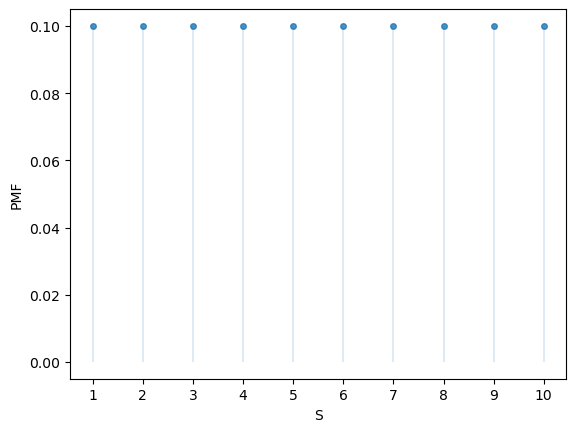

In [7]:
fig, ax = plt.subplots()
S = np.arange(1, n+1)
ax.plot(S, u.pmf(S), linestyle='', marker='o', alpha=0.8, ms=4)
ax.vlines(S, 0, u.pmf(S), lw=0.2)
ax.set_xticks(S)
ax.set_xlabel('S')
ax.set_ylabel('PMF')
plt.show()

Here's a plot of the CDF:

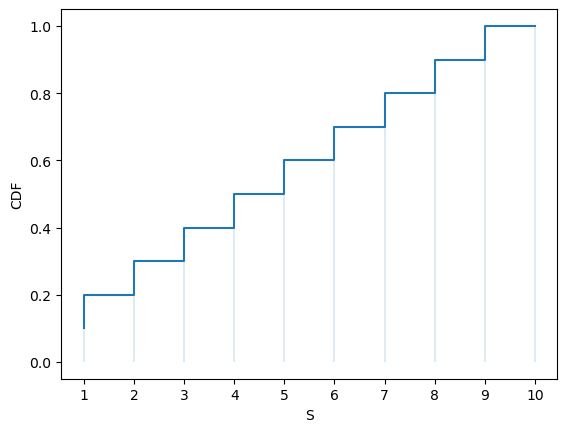

In [8]:
fig, ax = plt.subplots()
S = np.arange(1, n+1)
ax.step(S, u.cdf(S))
ax.vlines(S, 0, u.cdf(S), lw=0.2)
ax.set_xticks(S)
ax.set_xlabel('S')
ax.set_ylabel('CDF')
plt.show()

The CDF jumps up by $p(x_i)$ at $x_i$.

```{exercise}
:label: prob_ex1

Calculate the mean and variance for this parameterization (i.e., $n=10$)
directly from the PMF, using the expressions given above.

Check that your answers agree with `u.mean()` and `u.var()`. 
```


#### Bernoulli distribution

Another useful distribution is the Bernoulli distribution on $S = \{0,1\}$, which has PMF:

$$
p(i) = \theta^i (1 - \theta)^{1-i}
\qquad (i = 0, 1)
$$

Here $\theta \in [0,1]$ is a parameter.

We can think of this distribution as modeling probabilities for a random trial with success probability $\theta$.

* $p(1) = \theta$ means that the trial succeeds (takes value 1) with probability $\theta$
* $p(0) = 1 - \theta$ means that the trial fails (takes value 0) with
  probability $1-\theta$

The formula for the mean is $\theta$, and the formula for the variance is $\theta(1-\theta)$.

We can import the Bernoulli distribution on $S = \{0,1\}$ from SciPy like so:

In [9]:
θ = 0.4
u = scipy.stats.bernoulli(θ)

Here's the mean and variance at $\theta=0.4$

In [10]:
u.mean(), u.var()

(0.4, 0.24)

We can evaluate the PMF as follows

In [11]:
u.pmf(0), u.pmf(1)

(0.6, 0.4)

#### Binomial distribution

Another useful (and more interesting) distribution is the **binomial distribution** on $S=\{0, \ldots, n\}$, which has PMF:

$$ 
p(i) = \binom{n}{i} \theta^i (1-\theta)^{n-i}
$$

Again, $\theta \in [0,1]$ is a parameter.

The interpretation of $p(i)$ is: the probability of $i$ successes in $n$ independent trials with success probability $\theta$.

For example, if $\theta=0.5$, then $p(i)$ is the probability of $i$ heads in $n$ flips of a fair coin.

The formula for the mean is $n \theta$ and the formula for the variance is $n \theta (1-\theta)$.

Let's investigate an example

In [12]:
n = 10
θ = 0.5
u = scipy.stats.binom(n, θ)

According to our formulas, the mean and variance are

In [13]:
n * θ,  n *  θ * (1 - θ)  

(5.0, 2.5)

Let's see if SciPy gives us the same results:

In [14]:
u.mean(), u.var()

(5.0, 2.5)

Here's the PMF:

In [15]:
u.pmf(1)

0.009765625000000002

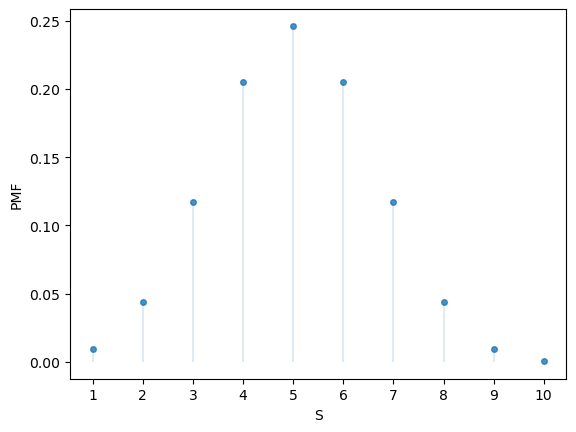

In [16]:
fig, ax = plt.subplots()
S = np.arange(1, n+1)
ax.plot(S, u.pmf(S), linestyle='', marker='o', alpha=0.8, ms=4)
ax.vlines(S, 0, u.pmf(S), lw=0.2)
ax.set_xticks(S)
ax.set_xlabel('S')
ax.set_ylabel('PMF')
plt.show()

Here's the CDF:

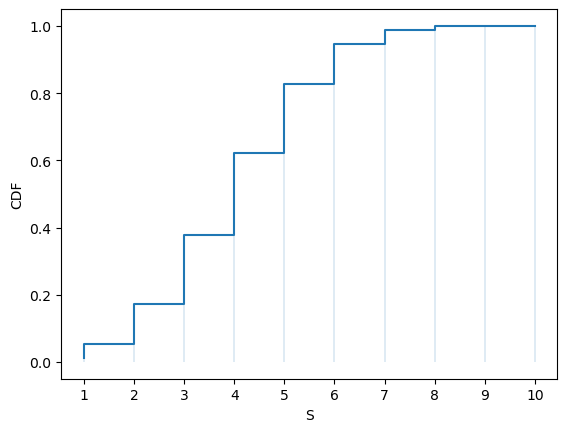

In [17]:
fig, ax = plt.subplots()
S = np.arange(1, n+1)
ax.step(S, u.cdf(S))
ax.vlines(S, 0, u.cdf(S), lw=0.2)
ax.set_xticks(S)
ax.set_xlabel('S')
ax.set_ylabel('CDF')
plt.show()

```{exercise}
:label: prob_ex3

Using `u.pmf`, check that our definition of the CDF given above calculates the same function as `u.cdf`.
```

```{solution-start} prob_ex3
:class: dropdown
```

Here is one solution:

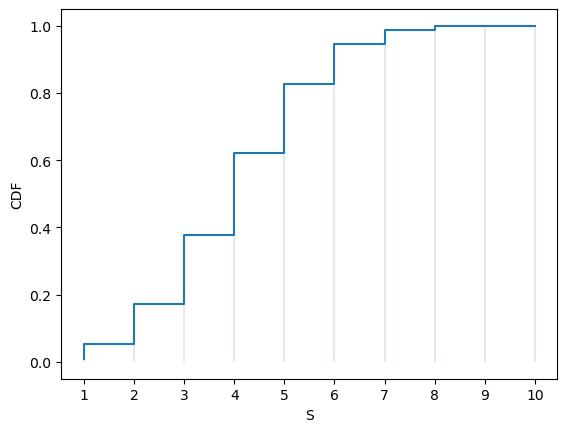

In [18]:
fig, ax = plt.subplots()
S = np.arange(1, n+1)
u_sum = np.cumsum(u.pmf(S))
ax.step(S, u_sum)
ax.vlines(S, 0, u_sum, lw=0.2)
ax.set_xticks(S)
ax.set_xlabel('S')
ax.set_ylabel('CDF')
plt.show()

We can see that the output graph is the same as the one above.

```{solution-end}
```

#### Geometric distribution

The geometric distribution has infinite support $S = \{0, 1, 2, \ldots\}$ and its PMF is given by 

$$
p(i) = (1 - \theta)^i \theta
$$

where $\theta \in [0,1]$ is a parameter

(A discrete distribution has infinite support if the set of points to which it assigns positive probability is infinite.)

To understand the distribution, think of repeated independent random trials, each with success probability $\theta$.

The interpretation of $p(i)$ is: the probability there are $i$ failures before the first success occurs.

It can be shown that the mean of the distribution is $1/\theta$ and the variance is $(1-\theta)/\theta$.

Here's an example.

In [19]:
θ = 0.1
u = scipy.stats.geom(θ)
u.mean(), u.var()

(10.0, 90.0)

Here's part of the PMF:

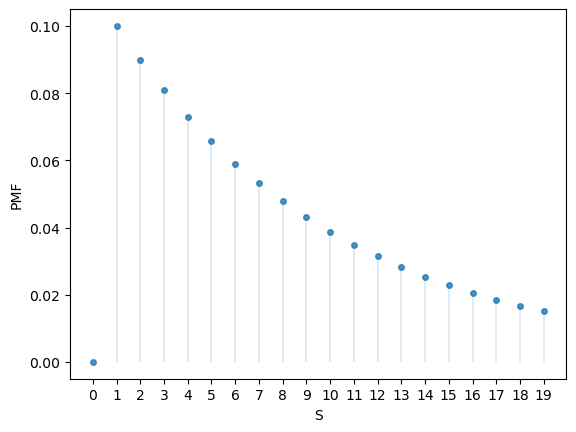

In [20]:
fig, ax = plt.subplots()
n = 20
S = np.arange(n)
ax.plot(S, u.pmf(S), linestyle='', marker='o', alpha=0.8, ms=4)
ax.vlines(S, 0, u.pmf(S), lw=0.2)
ax.set_xticks(S)
ax.set_xlabel('S')
ax.set_ylabel('PMF')
plt.show()

#### Poisson distribution

The Poisson distribution on $S = \{0, 1, \ldots\}$ with parameter $\lambda > 0$ has PMF

$$
p(i) = \frac{\lambda^i}{i!} e^{-\lambda}
$$

The interpretation of $p(i)$ is: the probability of $i$ events in a fixed time interval, where the events occur independently at a constant rate $\lambda$.

It can be shown that the mean is $\lambda$ and the variance is also $\lambda$.

Here's an example.

In [21]:
λ = 2
u = scipy.stats.poisson(λ)
u.mean(), u.var()

(2.0, 2.0)

Here's the PMF:

In [22]:
u.pmf(1)

0.2706705664732254

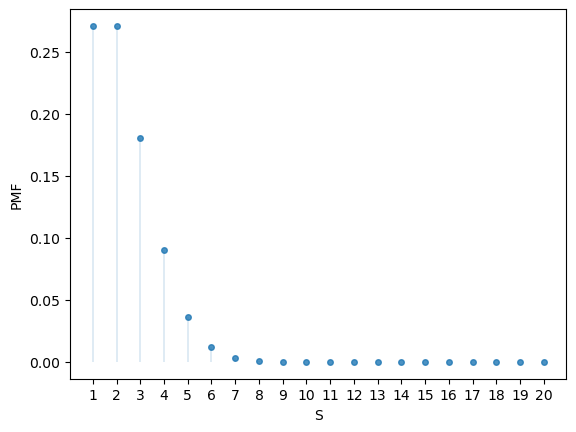

In [23]:
fig, ax = plt.subplots()
S = np.arange(1, n+1)
ax.plot(S, u.pmf(S), linestyle='', marker='o', alpha=0.8, ms=4)
ax.vlines(S, 0, u.pmf(S), lw=0.2)
ax.set_xticks(S)
ax.set_xlabel('S')
ax.set_ylabel('PMF')
plt.show()

### Continuous distributions


A continuous distribution is represented by a **probability density function**, which is a function $p$ over $\mathbb R$ (the set of all real numbers) such that $p(x) \geq 0$ for all $x$ and

$$ 
\int_{-\infty}^\infty p(x) dx = 1 
$$

We say that random variable $X$ has distribution $p$ if

$$
\mathbb P\{a < X < b\} = \int_a^b p(x) dx
$$

for all $a \leq b$.

The definition of the mean and variance of a random variable $X$ with distribution $p$ are the same as the discrete case, after replacing the sum with an integral.

For example, the mean of $X$ is

$$
\mathbb{E}[X] = \int_{-\infty}^\infty x p(x) dx
$$

The **cumulative distribution function** (CDF) of $X$ is defined by

$$
F(x) = \mathbb P\{X \leq x\}
        = \int_{-\infty}^x p(x) dx
$$


#### Normal distribution

Perhaps the most famous distribution is the **normal distribution**, which has density

$$
p(x) = \frac{1}{\sqrt{2\pi}\sigma}
            \exp\left(-\frac{(x-\mu)^2}{2\sigma^2}\right)
$$

This distribution has two parameters, $\mu \in \mathbb R$ and $\sigma \in (0, \infty)$.  

Using calculus, it can be shown that, for this distribution, the mean is $\mu$ and the variance is $\sigma^2$.

We can obtain the moments, PDF and CDF of the normal density via SciPy as follows:

In [24]:
μ, σ = 0.0, 1.0
u = scipy.stats.norm(μ, σ)

In [25]:
u.mean(), u.var()

(0.0, 1.0)

Here's a plot of the density --- the famous "bell-shaped curve":

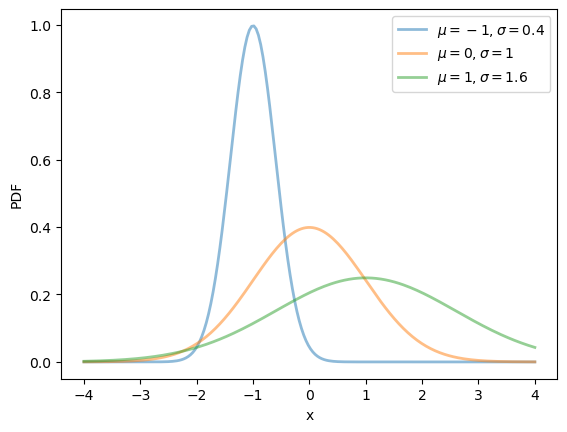

In [26]:
μ_vals = [-1, 0, 1]
σ_vals = [0.4, 1, 1.6]
fig, ax = plt.subplots()
x_grid = np.linspace(-4, 4, 200)

for μ, σ in zip(μ_vals, σ_vals):
    u = scipy.stats.norm(μ, σ)
    ax.plot(x_grid, u.pdf(x_grid),
    alpha=0.5, lw=2,
    label=f'$\mu={μ}, \sigma={σ}$')
ax.set_xlabel('x')
ax.set_ylabel('PDF')
plt.legend()
plt.show()

Here's a plot of the CDF:

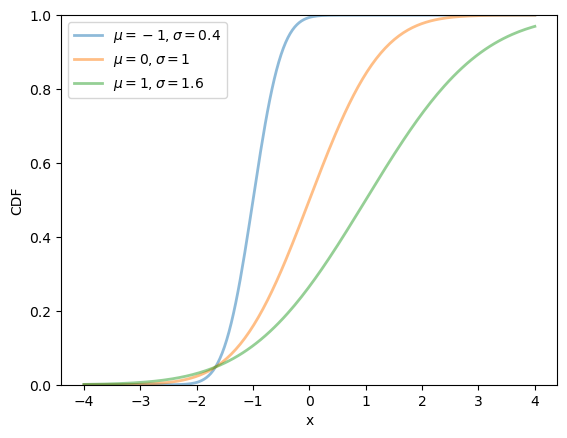

In [27]:
fig, ax = plt.subplots()
for μ, σ in zip(μ_vals, σ_vals):
    u = scipy.stats.norm(μ, σ)
    ax.plot(x_grid, u.cdf(x_grid),
    alpha=0.5, lw=2,
    label=f'$\mu={μ}, \sigma={σ}$')
    ax.set_ylim(0, 1)
ax.set_xlabel('x')
ax.set_ylabel('CDF')
plt.legend()
plt.show()

#### Lognormal distribution

The **lognormal distribution** is a distribution on $\left(0, \infty\right)$ with density

$$
p(x) = \frac{1}{\sigma x \sqrt{2\pi}}
    \exp \left(- \frac{\left(\log x - \mu\right)^2}{2 \sigma^2} \right)
$$

This distribution has two parameters, $\mu$ and $\sigma$.

It can be shown that, for this distribution, the mean is $\exp\left(\mu + \sigma^2/2\right)$ and the variance is $\left[\exp\left(\sigma^2\right) - 1\right] \exp\left(2\mu + \sigma^2\right)$.

It can be proved that 

* if $X$ is lognormally distributed, then $\log X$ is normally distributed, and
* if $X$ is normally distributed, then $\exp X$ is lognormally distributed.

We can obtain the moments, PDF, and CDF of the lognormal density as follows:

In [28]:
μ, σ = 0.0, 1.0
u = scipy.stats.lognorm(s=σ, scale=np.exp(μ))

In [29]:
u.mean(), u.var()

(1.6487212707001282, 4.670774270471604)

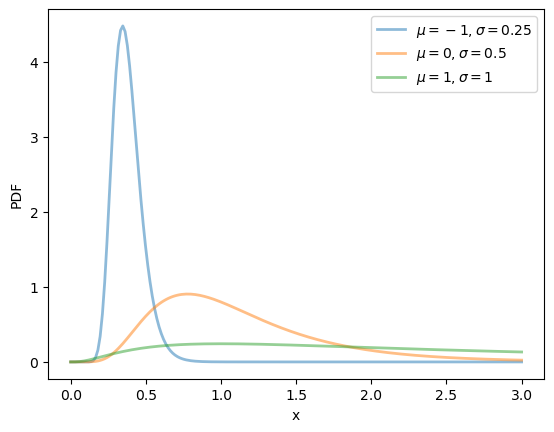

In [30]:
μ_vals = [-1, 0, 1]
σ_vals = [0.25, 0.5, 1]
x_grid = np.linspace(0, 3, 200)

fig, ax = plt.subplots()
for μ, σ in zip(μ_vals, σ_vals):
    u = scipy.stats.lognorm(σ, scale=np.exp(μ))
    ax.plot(x_grid, u.pdf(x_grid),
    alpha=0.5, lw=2,
    label=f'$\mu={μ}, \sigma={σ}$')
ax.set_xlabel('x')
ax.set_ylabel('PDF')
plt.legend()
plt.show()

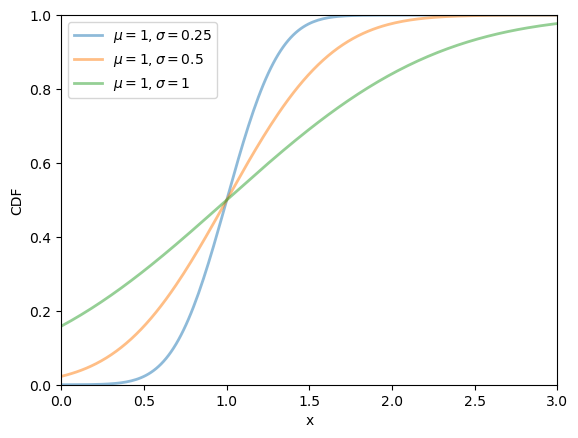

In [31]:
fig, ax = plt.subplots()
μ = 1
for σ in σ_vals:
    u = scipy.stats.norm(μ, σ)
    ax.plot(x_grid, u.cdf(x_grid),
    alpha=0.5, lw=2,
    label=f'$\mu={μ}, \sigma={σ}$')
    ax.set_ylim(0, 1)
    ax.set_xlim(0, 3)
ax.set_xlabel('x')
ax.set_ylabel('CDF')
plt.legend()
plt.show()

#### Exponential distribution

The **exponential distribution** is a distribution supported on $\left(0, \infty\right)$ with density

$$
p(x) = \lambda \exp \left( - \lambda x \right)
\qquad (x > 0)
$$

This distribution has one parameter $\lambda$.

The exponential distribution can be thought of as the continuous analog of the geometric distribution.

It can be shown that, for this distribution, the mean is $1/\lambda$ and the variance is $1/\lambda^2$.

We can obtain the moments, PDF, and CDF of the exponential density as follows:

In [32]:
λ = 1.0
u = scipy.stats.expon(scale=1/λ)

In [33]:
u.mean(), u.var()

(1.0, 1.0)

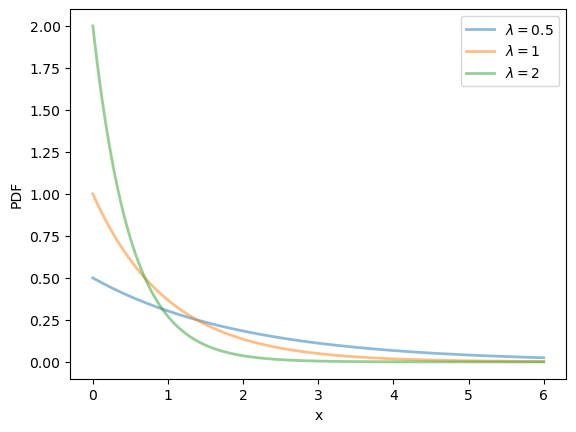

In [34]:
fig, ax = plt.subplots()
λ_vals = [0.5, 1, 2]
x_grid = np.linspace(0, 6, 200)

for λ in λ_vals:
    u = scipy.stats.expon(scale=1/λ)
    ax.plot(x_grid, u.pdf(x_grid),
    alpha=0.5, lw=2,
    label=f'$\lambda={λ}$')
ax.set_xlabel('x')
ax.set_ylabel('PDF')
plt.legend()
plt.show()

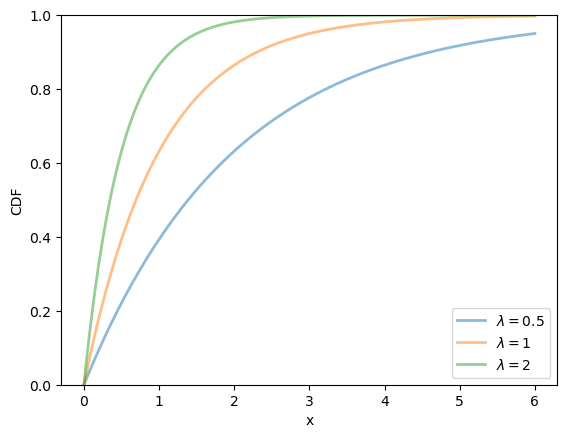

In [35]:
fig, ax = plt.subplots()
for λ in λ_vals:
    u = scipy.stats.expon(scale=1/λ)
    ax.plot(x_grid, u.cdf(x_grid),
    alpha=0.5, lw=2,
    label=f'$\lambda={λ}$')
    ax.set_ylim(0, 1)
ax.set_xlabel('x')
ax.set_ylabel('CDF')
plt.legend()
plt.show()

#### Beta distribution

The **beta distribution** is a distribution on $(0, 1)$ with density

$$
p(x) = \frac{\Gamma(\alpha + \beta)}{\Gamma(\alpha) \Gamma(\beta)}
    x^{\alpha - 1} (1 - x)^{\beta - 1}
$$

where $\Gamma$ is the [gamma function](https://en.wikipedia.org/wiki/Gamma_function).

(The role of the gamma function is just to normalize the density, so that it
integrates to one.)

This distribution has two parameters, $\alpha > 0$ and $\beta > 0$.

It can be shown that, for this distribution, the mean is $\alpha / (\alpha + \beta)$ and 
the variance is $\alpha \beta / (\alpha + \beta)^2 (\alpha + \beta + 1)$.

We can obtain the moments, PDF, and CDF of the Beta density as follows:

In [36]:
α, β = 3.0, 1.0
u = scipy.stats.beta(α, β)

In [37]:
u.mean(), u.var()

(0.75, 0.0375)

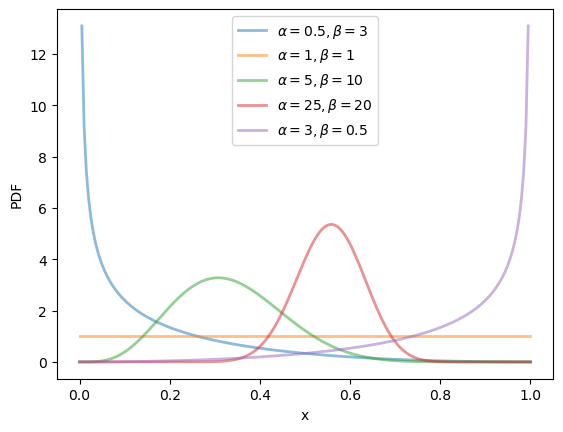

In [38]:
α_vals = [0.5, 1, 5, 25, 3]
β_vals = [3, 1, 10, 20, 0.5]
x_grid = np.linspace(0, 1, 200)

fig, ax = plt.subplots()
for α, β in zip(α_vals, β_vals):
    u = scipy.stats.beta(α, β)
    ax.plot(x_grid, u.pdf(x_grid),
    alpha=0.5, lw=2,
    label=fr'$\alpha={α}, \beta={β}$')
ax.set_xlabel('x')
ax.set_ylabel('PDF')
plt.legend()
plt.show()

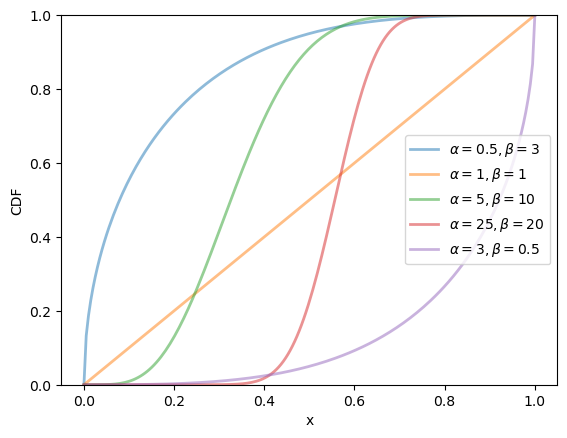

In [39]:
fig, ax = plt.subplots()
for α, β in zip(α_vals, β_vals):
    u = scipy.stats.beta(α, β)
    ax.plot(x_grid, u.cdf(x_grid),
    alpha=0.5, lw=2,
    label=fr'$\alpha={α}, \beta={β}$')
    ax.set_ylim(0, 1)
ax.set_xlabel('x')
ax.set_ylabel('CDF')
plt.legend()
plt.show()

#### Gamma distribution

The **gamma distribution** is a distribution on $\left(0, \infty\right)$ with density

$$
p(x) = \frac{\beta^\alpha}{\Gamma(\alpha)}
    x^{\alpha - 1} \exp(-\beta x)
$$

This distribution has two parameters, $\alpha > 0$ and $\beta > 0$.

It can be shown that, for this distribution, the mean is $\alpha / \beta$ and
the variance is $\alpha / \beta^2$.

One interpretation is that if $X$ is gamma distributed and $\alpha$ is an
integer, then $X$ is the sum of $\alpha$ independent exponentially distributed
random variables with mean $1/\beta$.

We can obtain the moments, PDF, and CDF of the Gamma density as follows:

In [40]:
α, β = 3.0, 2.0
u = scipy.stats.gamma(α, scale=1/β)

In [41]:
u.mean(), u.var()

(1.5, 0.75)

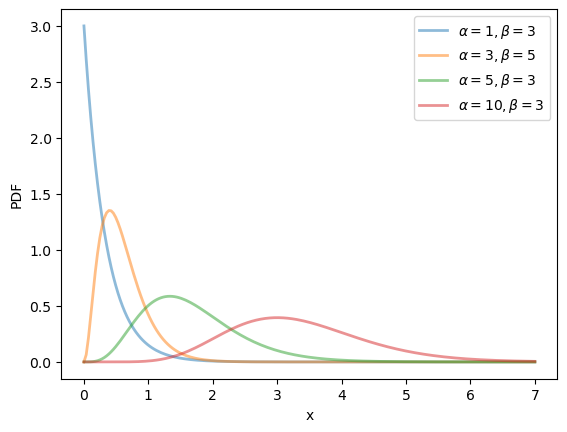

In [42]:
α_vals = [1, 3, 5, 10]
β_vals = [3, 5, 3, 3]
x_grid = np.linspace(0, 7, 200)

fig, ax = plt.subplots()
for α, β in zip(α_vals, β_vals):
    u = scipy.stats.gamma(α, scale=1/β)
    ax.plot(x_grid, u.pdf(x_grid),
    alpha=0.5, lw=2,
    label=fr'$\alpha={α}, \beta={β}$')
ax.set_xlabel('x')
ax.set_ylabel('PDF')
plt.legend()
plt.show()

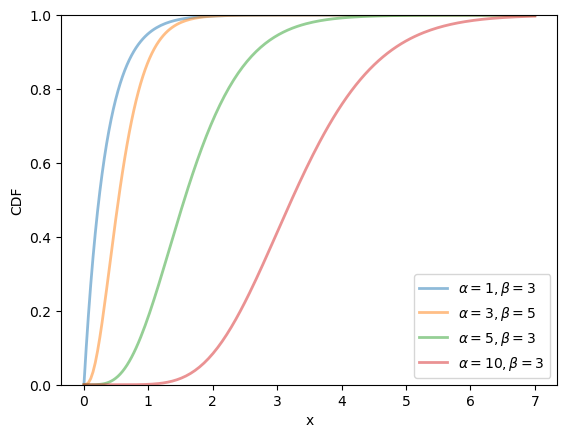

In [43]:
fig, ax = plt.subplots()
for α, β in zip(α_vals, β_vals):
    u = scipy.stats.gamma(α, scale=1/β)
    ax.plot(x_grid, u.cdf(x_grid),
    alpha=0.5, lw=2,
    label=fr'$\alpha={α}, \beta={β}$')
    ax.set_ylim(0, 1)
ax.set_xlabel('x')
ax.set_ylabel('CDF')
plt.legend()
plt.show()

## Observed distributions


Sometimes we refer to observed data or measurements as "distributions".

For example, let's say we observe the income of 10 people over a year:

In [44]:
data = [['Hiroshi', 1200], 
        ['Ako', 1210], 
        ['Emi', 1400],
        ['Daiki', 990],
        ['Chiyo', 1530],
        ['Taka', 1210],
        ['Katsuhiko', 1240],
        ['Daisuke', 1124],
        ['Yoshi', 1330],
        ['Rie', 1340]]

df = pd.DataFrame(data, columns=['name', 'income'])
df

,name,income
0,Hiroshi,1200
1,Ako,1210
2,Emi,1400
3,Daiki,990
4,Chiyo,1530
5,Taka,1210
6,Katsuhiko,1240
7,Daisuke,1124
8,Yoshi,1330
9,Rie,1340


In this situation, we might refer to the set of their incomes as the "income distribution."

The terminology is confusing because this set is not a probability distribution
--- it's just a collection of numbers.

However, as we will see, there are connections between observed distributions (i.e., sets of
numbers like the income distribution above) and probability distributions.

Below we explore some observed distributions.


### Summary statistics

Suppose we have an observed distribution with values $\{x_1, \ldots, x_n\}$

The **sample mean** of this distribution is defined as

$$
\bar x = \frac{1}{n} \sum_{i=1}^n x_i
$$

The **sample variance** is defined as 

$$
\frac{1}{n} \sum_{i=1}^n (x_i - \bar x)^2
$$

For the income distribution given above, we can calculate these numbers via

In [45]:
x = df['income']
x.mean(), x.var()

(1257.4, 22680.933333333334)

```{exercise}
:label: prob_ex4

If you try to check that the formulas given above for the sample mean and sample
variance produce the same numbers, you will see that the variance isn't quite
right.  This is because SciPy uses $1/(n-1)$ instead of $1/n$ as the term at the
front of the variance. (Some books define the sample variance this way.)
Confirm.
```


### Visualization

Let's look at different ways that we can visualize one or more observed distributions.

We will cover

- histograms
- kernel density estimates and
- violin plots


#### Histograms

We can histogram the income distribution we just constructed as follows

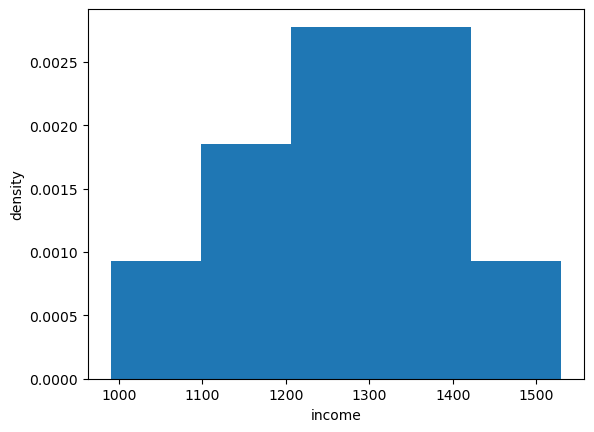

In [46]:
fig, ax = plt.subplots()
ax.hist(x, bins=5, density=True, histtype='bar')
ax.set_xlabel('income')
ax.set_ylabel('density')
plt.show()

Let's look at a distribution from real data.

In particular, we will look at the monthly return on Amazon shares between 2000/1/1 and 2024/1/1.

The monthly return is calculated as the percent change in the share price over each month.

So we will have one observation for each month.

In [47]:
df = yf.download('AMZN', '2000-1-1', '2024-1-1', interval='1mo')
prices = df['Adj Close']
x_amazon = prices.pct_change()[1:] * 100
x_amazon.head()

[*********************100%***********************]  1 of 1 completed

Date
2000-02-01     6.679568
2000-03-01    -2.722323
2000-04-01   -17.630592
2000-05-01   -12.457531
2000-06-01   -24.838297
Name: Adj Close, dtype: float64

The first observation is the monthly return (percent change) over January 2000, which was

In [48]:
x_amazon.iloc[0]

6.6795679502808625

Let's turn the return observations into an array and histogram it.

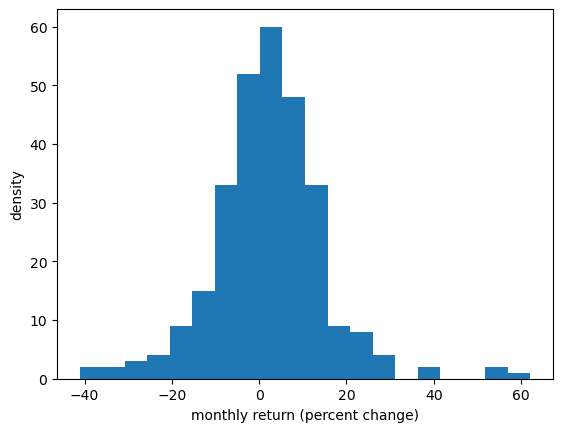

In [49]:
fig, ax = plt.subplots()
ax.hist(x_amazon, bins=20)
ax.set_xlabel('monthly return (percent change)')
ax.set_ylabel('density')
plt.show()

#### Kernel density estimates

Kernel density estimates (KDE) provide a simple way to estimate and visualize the density of a distribution.

If you are not familiar with KDEs, you can think of them as a smoothed
histogram.

Let's have a look at a KDE formed from the Amazon return data.

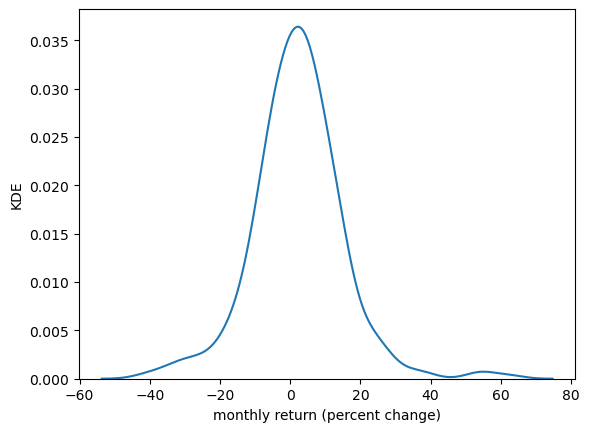

In [50]:
fig, ax = plt.subplots()
sns.kdeplot(x_amazon, ax=ax)
ax.set_xlabel('monthly return (percent change)')
ax.set_ylabel('KDE')
plt.show()

The smoothness of the KDE is dependent on how we choose the bandwidth.

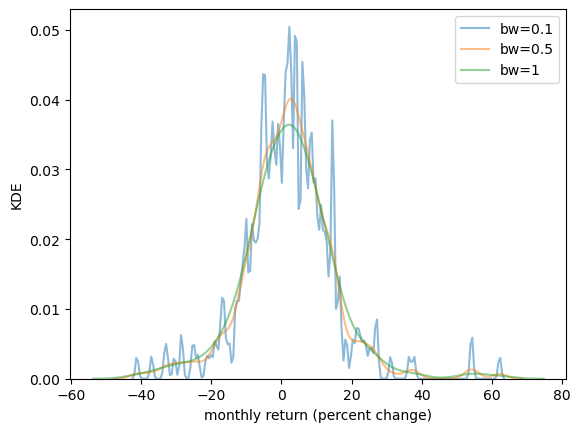

In [51]:
fig, ax = plt.subplots()
sns.kdeplot(x_amazon, ax=ax, bw_adjust=0.1, alpha=0.5, label="bw=0.1")
sns.kdeplot(x_amazon, ax=ax, bw_adjust=0.5, alpha=0.5, label="bw=0.5")
sns.kdeplot(x_amazon, ax=ax, bw_adjust=1, alpha=0.5, label="bw=1")
ax.set_xlabel('monthly return (percent change)')
ax.set_ylabel('KDE')
plt.legend()
plt.show()

When we use a larger bandwidth, the KDE is smoother.

A suitable bandwidth is not too smooth (underfitting) or too wiggly (overfitting).


#### Violin plots


Another way to display an observed distribution is via a violin plot.

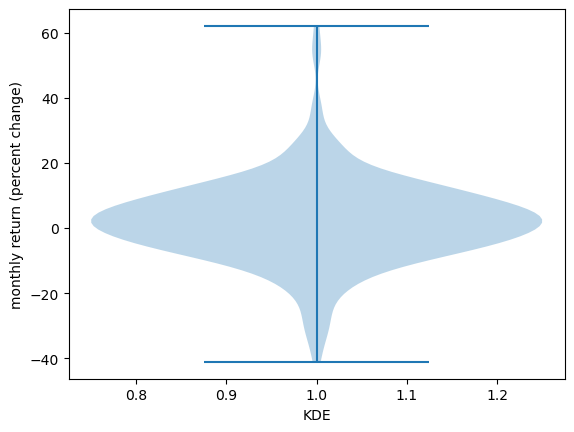

In [52]:
fig, ax = plt.subplots()
ax.violinplot(x_amazon)
ax.set_ylabel('monthly return (percent change)')
ax.set_xlabel('KDE')
plt.show()

Violin plots are particularly useful when we want to compare different distributions.

For example, let's compare the monthly returns on Amazon shares with the monthly return on Costco shares.

In [53]:
df = yf.download('COST', '2000-1-1', '2024-1-1', interval='1mo')
prices = df['Adj Close']
x_costco = prices.pct_change()[1:] * 100

[*********************100%***********************]  1 of 1 completed

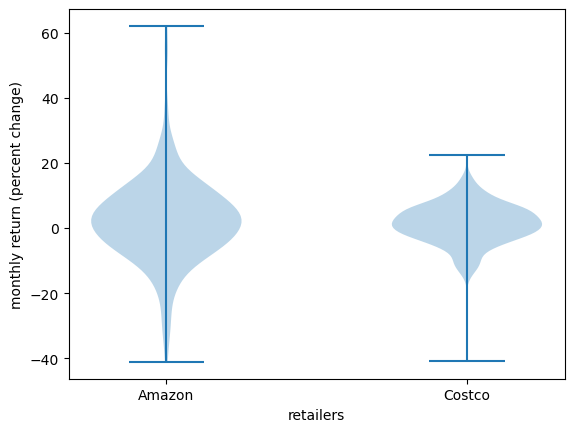

In [54]:
fig, ax = plt.subplots()
ax.violinplot([x_amazon, x_costco])
ax.set_ylabel('monthly return (percent change)')
ax.set_xlabel('retailers')

ax.set_xticks([1, 2])
ax.set_xticklabels(['Amazon', 'Costco'])
plt.show()

### Connection to probability distributions

Let's discuss the connection between observed distributions and probability distributions.

Sometimes it's helpful to imagine that an observed distribution is generated by a particular probability distribution.

For example, we might look at the returns from Amazon above and imagine that they were generated by a normal distribution.

(Even though this is not true, it *might* be a helpful way to think about the data.)

Here we match a normal distribution to the Amazon monthly returns by setting the
sample mean to the mean of the normal distribution and the sample variance equal
to the variance.

Then we plot the density and the histogram.

In [55]:
μ = x_amazon.mean()
σ_squared = x_amazon.var()
σ = np.sqrt(σ_squared)
u = scipy.stats.norm(μ, σ)

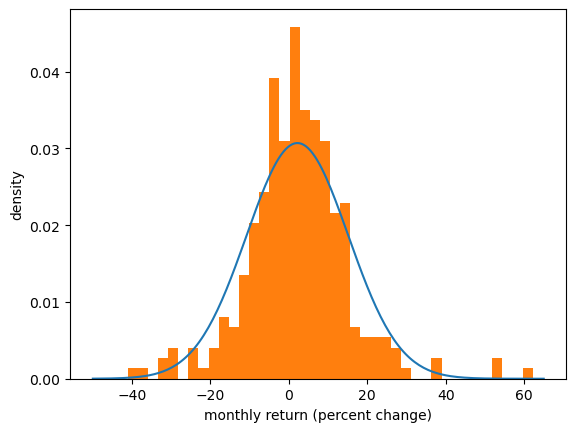

In [56]:
x_grid = np.linspace(-50, 65, 200)
fig, ax = plt.subplots()
ax.plot(x_grid, u.pdf(x_grid))
ax.hist(x_amazon, density=True, bins=40)
ax.set_xlabel('monthly return (percent change)')
ax.set_ylabel('density')
plt.show()

The match between the histogram and the density is not bad but also not very good.

One reason is that the normal distribution is not really a good fit for this observed data --- we will discuss this point again when we talk about {ref}`heavy tailed distributions<heavy_tail>`.

Of course, if the data really *is* generated by the normal distribution, then the fit will be better.

Let's see this in action

- first we generate random draws from the normal distribution
- then we histogram them and compare with the density.

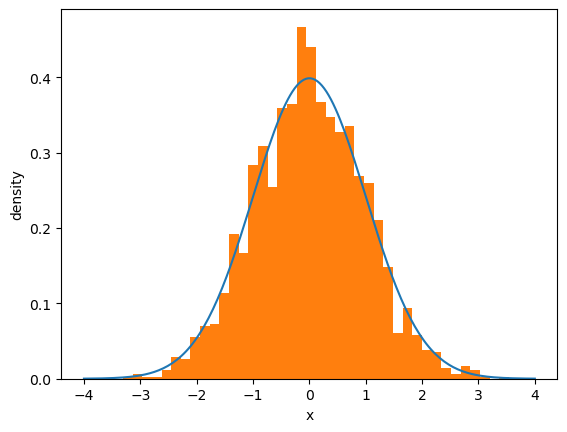

In [57]:
μ, σ = 0, 1
u = scipy.stats.norm(μ, σ)
N = 2000  # Number of observations
x_draws = u.rvs(N)
x_grid = np.linspace(-4, 4, 200)
fig, ax = plt.subplots()
ax.plot(x_grid, u.pdf(x_grid))
ax.hist(x_draws, density=True, bins=40)
ax.set_xlabel('x')
ax.set_ylabel('density')
plt.show()

Note that if you keep increasing $N$, which is the number of observations, the fit will get better and better.

This convergence is a version of the "law of large numbers", which we will discuss {ref}`later<lln_mr>`.